In [2]:
import numpy as np
import pandas as pd
import scipy.io as sio
import matplotlib.pyplot as plt
%matplotlib inline

First, let's unpack the data set from the ex4data1.mat, the data is 
available on the coursera site for the machine learning class https://www.coursera.org/learn/machine-learning tought by Andrew NG lecture 4. Also there is a number of clones that have this data file.

In [3]:
data = sio.loadmat('ex4data1.mat')
X,y = map(data.get, ('X', 'y'))

In [4]:
# This function plots the given sample set of images as a grid with labels 
# if labels are available.
def plot_sample(S,labels=None):
    m, n = S.shape;
    example_width = int(np.round(np.sqrt(n)));
    example_height = int((n / example_width));
  
    # Compute number of items to display
    display_rows = int(np.floor(np.sqrt(m)));
    display_cols = int(np.ceil(m / display_rows));
   
    fig = plt.figure()
    for i in range(0,m):
        arr = S[i,:]
        arr = arr.reshape((example_width,example_height))
        ax = fig.add_subplot(display_rows,display_cols , i+1)
        ax.imshow(np.transpose(arr), aspect='auto')
        if labels is not None:
            ax.text(0,0, '{}'.format(labels[i]), bbox={'facecolor':'white', 'alpha':0.8,'pad':2})
        ax.axis('off')
    plt.show()

Let's plot a random 100 images

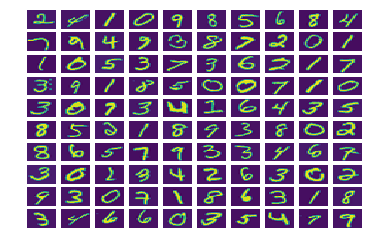

In [5]:
samples = np.random.permutation(X)[:100,:]
plot_sample(samples)

Now, let use the Neural Network with 1 hidden layers. The number of neurons in each layer is X_train.shape[1] which is 400 in our example (excluding the extra bias unit).

In [22]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split

# since the data we have is one big array, we want to split it into training
# and testing sets, the split is 70% goes to training and 30% of data for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

neural_network =(80,)

# for this excersize we are using MLPClassifier with lbfgs optimizer (the family of quasi-Newton methods). In my simple
# experiments it produces good quality outcome
clf = MLPClassifier(solver='lbfgs', alpha=1, hidden_layer_sizes=neural_network)
clf.fit(X_train, y_train.ravel())

# So after the classifier is trained, lets see what it predicts on the test data
prediction = clf.predict(X_test)

quality = np.where(prediction == y_test.ravel(),1,0)
print ("Percentage of correct results is {:.04f}".format(np.count_nonzero(quality)/len(quality)))

Percentage of correct results is 0.9547


My experiments produceed 95% of correct results. Let's visualize that.

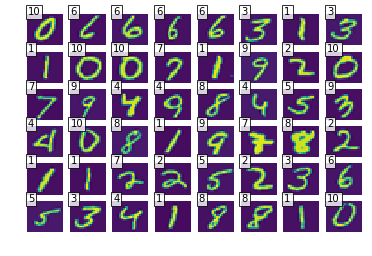

In [23]:
# I am going to use the same test set of data and will select random 48 examples from it.
# The top left corner is the prediction from the Neural Network
# please note that 0 is represented as 10 in this data set
rnd = np.random.randint(len(X_test), size=48)
plot_sample(X_test[rnd],prediction[rnd])